In [144]:
from aocd.models import Puzzle
import re

puzzle = Puzzle(year=2023, day=22)

def parses(input):
    def parse_line(line):
        nums = [int(i) for i in re.findall('-?\d+', line)]
        return (tuple(nums[:3]), tuple(nums[3:]))
    return [parse_line(line) for line in input.strip().split('\n')]

# import re
# def parses(input):
#     return [int(re.findall('\d', line)) for line in nput.strip().split('\n')]

data = parses(puzzle.input_data)

In [145]:
sample = parses("""1,0,1~1,2,1
0,0,2~2,0,2
0,2,3~2,2,3
0,0,4~0,2,4
2,0,5~2,2,5
0,1,6~2,1,6
1,1,8~1,1,9""")

In [146]:
# data = sample

In [147]:
def viz(coords):
    P = np.array(coords)
    m = P[:,0].min(axis=0)
    M = P[:,1].max(axis=0)
    X, Y, Z = 1+(M-m)
    P -= m
    vol = np.zeros((X,Y,Z), dtype=np.uint16)
    
    for (a,b,c), (d,e,f) in P:
        vol[a:d+1,b:e+1, c:f+1] += 1    
        
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(vol.max(axis=0).T[::-1])
    ax[1].imshow(vol.max(axis=1).T[::-1])
    plt.show()
    
    return vol

def char(i):
    return chr(ord('A')+i)

In [170]:
from collections import defaultdict
from functools import reduce

In [174]:
def build_graph(data):
    N, M, _ = [1+reduce(max, [p[1][i] for p in data]) for i in range(3)]
    heights = np.array([[0 for _ in range(M)] for _ in range(N)], dtype=np.int32)
    stack = sorted(data, key=lambda p: -p[0][2])
    
    bricks = []
    by_height = defaultdict(list)
    while stack:
        ((x0,y0,z0), (x1,y1,z1)) = stack.pop()
        h = 1 + heights[x0:x1+1,y0:y1+1].max()
        H = h+z1-z0
        bricks.append(((x0,y0,h),(x1,y1,H)))
        heights[x0:x1+1, y0:y1+1] = H
        by_height[H].append(len(bricks)-1)
    
    below = defaultdict(list)
    above = defaultdict(list)
    
    for i, p in enumerate(bricks):
        zmin = p[0][2]
        for candidate in by_height[zmin-1]:
            inter = np.zeros_like(heights)
            (x0,y0,z0), (x1,y1,z1) = p
            (x2,y2,z2), (x3,y3,z3) = bricks[candidate]
            inter[x0:x1+1, y0:y1+1] += 1
            inter[x2:x3+1, y2:y3+1] += 1
            if inter.max() == 2:
                below[i].append(candidate)
                above[candidate].append(i)
    return bricks, below, above

In [175]:
def solve_a(data):
    bricks, below, above = build_graph(data)
    can_disintegrate = 0
    for i, _ in enumerate(bricks):
        for ontop in above[i]:
            if len(below[ontop]) == 1:
                break
        else:
            can_disintegrate += 1
    return can_disintegrate

In [188]:
def solve_b(data):
    bricks, below, above = build_graph(data)
            
    total = 0
    for k in range(len(bricks)):
        falling = set([k])
        for i in range(len(bricks)):
            supports = [b in falling for b in below[i]]
            if len(supports) > 0 and all(supports):
                falling.add(i)
        total += len(falling) - 1 
    return total

In [189]:
solve_a(sample)

5

In [190]:
solve_a(data)

457

In [191]:
solve_b(sample)

7

In [192]:
solve_b(data)

79122

In [150]:
# solve_a(sample)

In [151]:
solve_a(data)

457

In [159]:
def solve_b(data):
    P = np.array(data)

    from functools import reduce
    N, M, H = [1+reduce(max, [p[i] for _, p in data]) for i in range(3)]
    heights = np.array([[0 for _ in range(M)] for _ in range(N)], dtype=np.int32)
    
    from collections import namedtuple
    heap = [(p[0][2], p) for p in data]
    heapify(heap)

    new_bricks = []
    while heap:
        _, ((x0,y0,z0), (x1,y1,z1)) = heappop(heap)
        h = 1 + heights[x0:x1+1,y0:y1+1].max()
        H = h+z1-z0
        new_bricks.append(((x0,y0,h),(x1,y1,H)))
        heights[x0:x1+1, y0:y1+1] = H
        
    by_height = defaultdict(list)
    for i, p in enumerate(new_bricks):
        zmax = p[1][2]
        by_height[zmax].append(i)
        
    supported_by = defaultdict(list)

    for i, p in enumerate(new_bricks):
        zmin = p[0][2]
        for candidate in by_height[zmin-1]:
            inter = np.zeros_like(heights)
            (x0,y0,z0), (x1,y1,z1) = p
            (x2,y2,z2), (x3,y3,z3) = new_bricks[candidate]
            inter[x0:x1+1, y0:y1+1] += 1
            inter[x2:x3+1, y2:y3+1] += 1
            if inter.max() == 2:
                supported_by[i].append(candidate)
                
    supporting = defaultdict(list)
    for brick, supports in supported_by.items():
        for support in supports:
            supporting[support].append(brick)

    can_disintegrate = 0
    for i, _ in enumerate(new_bricks):
        for ontop in supporting[i]:
            if len(supported_by[ontop]) == 1:
                break
        else:
            can_disintegrate += 1
            
    total = 0
    for k in range(len(bricks)):
        falling = set([k])

        for i in range(len(bricks)):
            supports = [b in falling for b in supported_by[i]]
            if len(supports) > 0 and all(supports):
                falling.add(i)
        total += len(falling) - 1 
    return total

In [160]:
solve_b(data)

79122

In [155]:
# bricks

In [156]:
# supported_by

In [158]:
total

79122

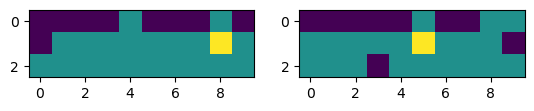

In [15]:
def solve_a(data):
    pass

In [2]:
def solve_b(data):
    pass